Credit Data with 1000 observations & 21 attributes.
    age  amount  duration  checking  history purpose  savings  employed  \
0   67    1169         6         1        4       3        5         5   
1   22    5951        48         2        2       3        1         3   

   installp  marital    ...     resident  property  other  housing  existcr  \
0         4        3    ...            4         1      3        2        2   
1         2        2    ...            2         1      3        2        1   

   job  depends  telephon  foreign  good_bad  
0    3        1         2        1      good  
1    3        1         1        1       bad  

[2 rows x 21 columns]

********** Data Preprocessing ***********
Features Dictionary Contains:
3 Interval, 
4 Binary, 
14 Nominal, and 
0 Excluded Attribute(s).

Data contains 1000 observations & 21 columns.


Attribute Counts
............... Missing  Outliers
age.......         0         0
amount....         0         0
checking..         0 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


precision.... 0.7662    0.0396
f1........... 0.8120    0.0128
max_depth= 6
Metric.......  Mean    Std. Dev.
accuracy..... 0.7080    0.0189
recall....... 0.8371    0.0508
precision.... 0.7741    0.0426
f1........... 0.8001    0.0078
max_depth= 7
Metric.......  Mean    Std. Dev.
accuracy..... 0.7090    0.0356
recall....... 0.8329    0.0461
precision.... 0.7714    0.0340
f1........... 0.8021    0.0209
max_depth= 8
Metric.......  Mean    Std. Dev.
accuracy..... 0.7040    0.0291
recall....... 0.8000    0.0491
precision.... 0.7849    0.0375
f1........... 0.7911    0.0202
max_depth= 10
Metric.......  Mean    Std. Dev.
accuracy..... 0.7010    0.0386
recall....... 0.7986    0.0573
precision.... 0.7887    0.0455
f1........... 0.7875    0.0284
max_depth= 12
Metric.......  Mean    Std. Dev.
accuracy..... 0.6940    0.0429
recall....... 0.7800    0.0448
precision.... 0.7870    0.0322
f1........... 0.7828    0.0308
max_depth= 15
Metric.......  Mean    Std. Dev.
accuracy..... 0.6990    0.0291
recall..

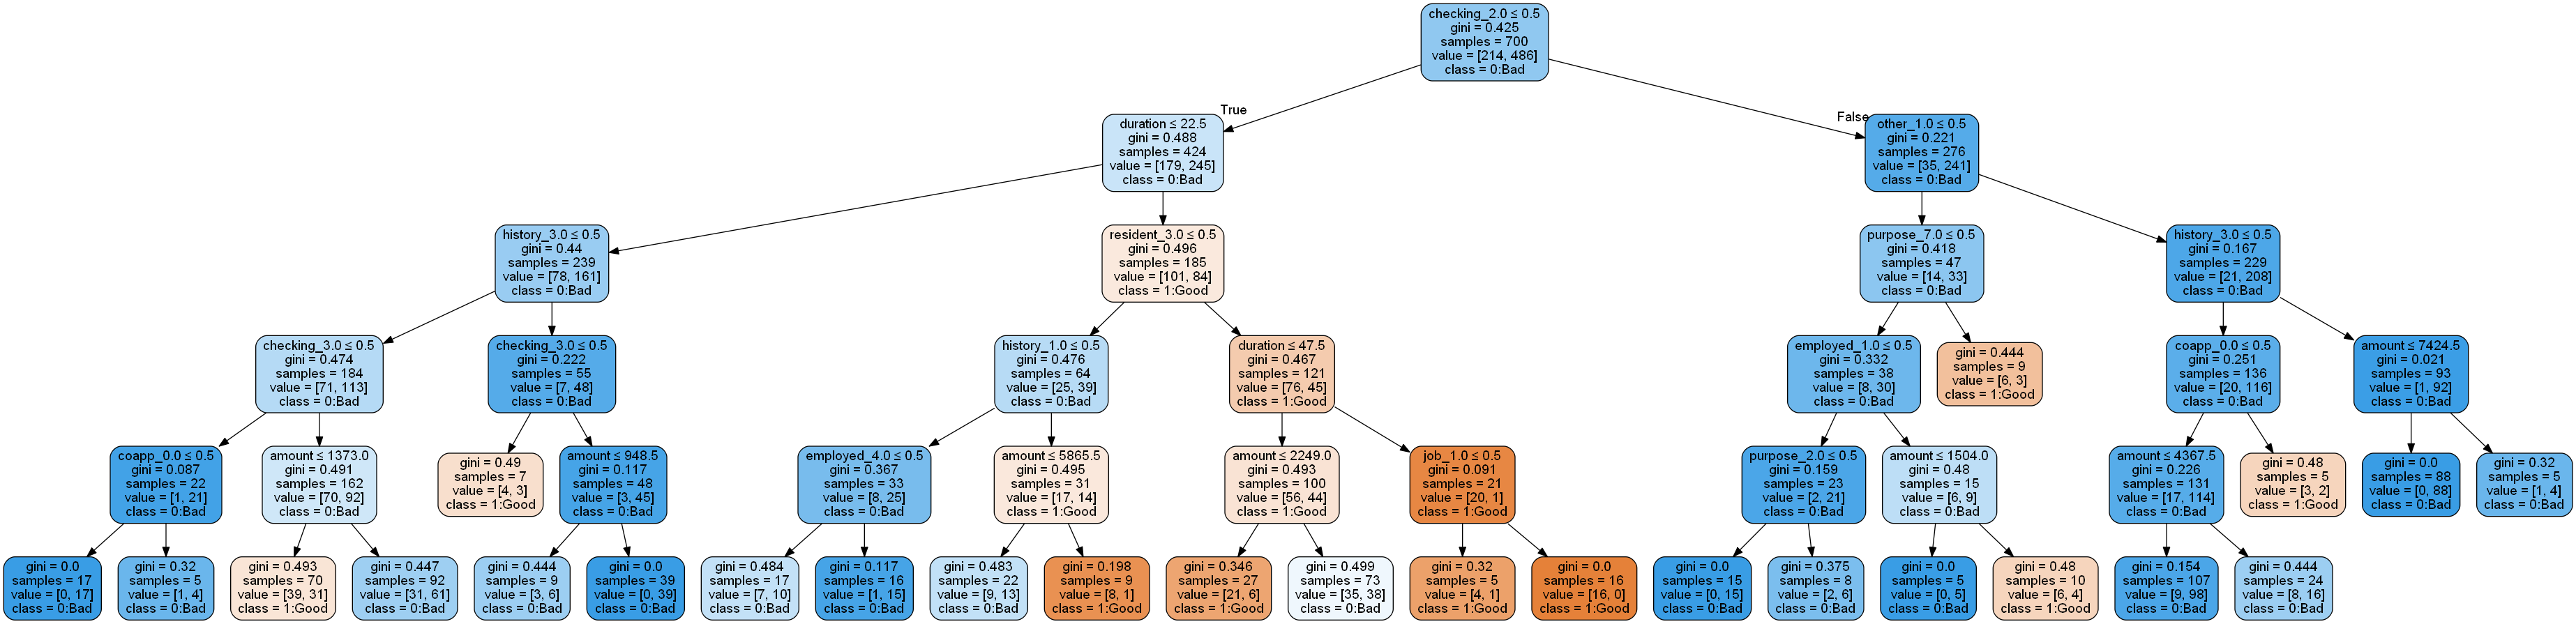

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 12 01:21:17 2019

@author: saman
"""

import pandas as pd
import numpy as np
from AdvancedAnalytics import DecisionTree
from AdvancedAnalytics import ReplaceImputeEncode
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import graphviz  
df = pd.read_excel("C:/Users/saman/OneDrive/Texas A&M/656/Python/CreditHistory_Clean.xlsx")
print("Credit Data with %i observations & %i attributes.\n"%df.shape, df[0:2])
df['checking']=df['checking'].astype(str)
df['coapp']=df['coapp'].astype(str)
df['depends']=df['depends'].astype(str)
df['employed']=df['employed'].astype(str)
df['existcr']=df['existcr'].astype(str)
df['history']=df['history'].astype(str)
df['foreign']=df['foreign'].astype(str)
df['good_bad']=df['good_bad'].astype(str)
df['installp']=df['installp'].astype(str)
df['job']=df['job'].astype(str)
df['marital']=df['marital'].astype(str)
df['other']=df['other'].astype(str)
df['property']=df['property'].astype(str)
df['purpose']=df['purpose'].astype(str)
df['resident']=df['resident'].astype(str)
df['savings']=df['savings'].astype(str)
df['telephon']=df['telephon'].astype(str)
df['housing']=df['housing'].astype(str)

attribute_map = {
        'age':['I', (19, 120)],
        'amount':['I', (0, 20000)],
        'checking':['N',('1','2','3','4')],
        'coapp':['N',('1', '2', '3')],
        'depends':['B',('1', '2')],
        'duration':['I',(1,72)],
        'employed':['N',('1','2','3','4','5')],
        'existcr':['N',('1','2','3','4')],
        'foreign':['B', ('1','2')],
        'good_bad':['B', ('bad','good')],
        'history':['N', ('0','1','2','3','4')],
        'housing':['N', ('1','2','3')],
        'installp':['N', ('1','2','3','4')] ,
        'job':['N', ('1','2','3','4')] ,
        'marital':['N', ('1','2','3','4')] ,
        'other':['N', ('1','2','3')] ,
        'property':['N', ('1','2','3','4')] ,
        'purpose':['N', ('0','1','2','3','4','5','6','8','9','X')] ,
        'resident':['N', ('1','2','3','4')] ,    
        'savings':['N', ('1','2','3','4','5')] ,    
        'telephon':['B', ('1','2')] }

rie = ReplaceImputeEncode(data_map=attribute_map, display=True,drop = False)
encoded_df = rie.fit_transform(df)
encoded_df.head()
encoded_df.dtypes

final_table =  pd.concat([encoded_df,pd.get_dummies(encoded_df['checking'], prefix='checking'),
                         pd.get_dummies(encoded_df['coapp'], prefix='coapp'),
                         pd.get_dummies(encoded_df['depends'], prefix='depends'),
                         pd.get_dummies(encoded_df['employed'], prefix='employed'),
                         pd.get_dummies(encoded_df['existcr'], prefix='existcr'),
                         pd.get_dummies(encoded_df['foreign'], prefix='foreign'),
                         pd.get_dummies(encoded_df['history'], prefix='history'),
                         pd.get_dummies(encoded_df['housing'], prefix='housing'),
                         pd.get_dummies(encoded_df['installp'], prefix='insatllp'),
                         pd.get_dummies(encoded_df['job'], prefix='job'),
                         pd.get_dummies(encoded_df['other'], prefix='other'),
                         pd.get_dummies(encoded_df['property'], prefix='property'),
                         pd.get_dummies(encoded_df['purpose'], prefix='purpose'),
                         pd.get_dummies(encoded_df['resident'], prefix='resident'),
                         pd.get_dummies(encoded_df['savings'], prefix='savings'),
                         pd.get_dummies(encoded_df['telephon'], prefix='telephon')],axis=1)

final_table.drop(['checking'],axis=1, inplace=True)
final_table.drop(['coapp'],axis=1, inplace=True)
final_table.drop(['depends'],axis=1, inplace=True)
final_table.drop(['employed'],axis=1, inplace=True)
final_table.drop(['existcr'],axis=1, inplace=True)
final_table.drop(['foreign'],axis=1, inplace=True)
final_table.drop(['history'],axis=1, inplace=True)
final_table.drop(['housing'],axis=1, inplace=True)
final_table.drop(['installp'],axis=1, inplace=True)
final_table.drop(['job'],axis=1, inplace=True)
final_table.drop(['other'],axis=1, inplace=True)
final_table.drop(['property'],axis=1, inplace=True)
final_table.drop(['purpose'],axis=1, inplace=True)
final_table.drop(['resident'],axis=1, inplace=True)
final_table.drop(['savings'],axis=1, inplace=True)
final_table.drop(['telephon'],axis=1, inplace=True)
final_table.head()

final_table.columns
varlist = ['good_bad']
X = np.asarray(final_table.drop(varlist, axis=1))
y = np.asarray(final_table[varlist])

#Implementing decision tree
from sklearn.model_selection import cross_val_score
search_depths = [5,6,7,8,10,12,15,20,25]
score_list = ['accuracy', 'recall', 'precision', 'f1']
for d in search_depths:
    dtc = DecisionTreeClassifier(criterion='gini', max_depth=d,min_samples_split=5, min_samples_leaf=5)
    mean_score = []
    std_score = []
    print("max_depth=", d)
    print("{:.<13s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
    for s in score_list:
        dtc_10 = cross_val_score(dtc, X, y, scoring=s, cv=10)
        mean = dtc_10.mean()
        std = dtc_10.std()
        mean_score.append(mean)
        std_score.append(std)
        print("{:.<13s}{:>7.4f}{:>10.4f}".format(s, mean, std))
        
#viewing 5 depth results
from sklearn import metrics
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_split=5, min_samples_leaf=5)
dtc = dtc.fit(X,y)
predtree = dtc.predict(X)
print("DecisionTrees's Accuracy: " , metrics.accuracy_score(y, predtree))

#TrainTest
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X,y,test_size = 0.3, random_state=1)
dtc7030 = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_split=5, min_samples_leaf=5)
dtc7030 = dtc7030.fit(X_train,y_train)
dtczz = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_split=5, min_samples_leaf=5)
dtcyy = dtczz.fit(X_train,y_train)
predtree = dtc7030.predict(X_validate)
trainpred=dtc7030.predict(X_train)
print("DecisionTrees's Accuracy: " , metrics.accuracy_score(y_validate, predtree))
print("{:.<13s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
for s in score_list:
        dtc_10 = cross_val_score(dtc, X, y, scoring=s, cv=10)
        mean = dtc_10.mean()
        std = dtc_10.std()
        mean_score.append(mean)
        std_score.append(std)
        print("{:.<13s}{:>7.4f}{:>10.4f}".format(s, mean, std))

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.image as mpimg
featureNames= final_table.columns[0:68]
dot_data = StringIO()
#featureNames=encoded_df[0:68]
export_graphviz(dtc7030,out_file=dot_data, class_names= ['1:Good','0:Bad'], feature_names = featureNames, filled=True, rounded=True,  special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())     
  

